In [ ]:
! mkdir src
! cd src && git clone https://github.com/huggingface/diffusers
! cd src/diffusers && pip install -e '.[torch]'
! pip install wandb sentencepiece
! cd src/diffusers/examples/dreambooth && pip install -r requirements.txt

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

In [ ]:
from huggingface_hub import snapshot_download

INSTANCE_DIR = "./src/diffusers/examples/dreambooth/me"
INSTANCE_DATASET = "williamberman/me"

snapshot_download(
    INSTANCE_DATASET,
    local_dir=INSTANCE_DIR, repo_type="dataset",
    ignore_patterns=".gitattributes",
)

Run in terminal

```sh
export MODEL_NAME="DeepFloyd/IF-I-XL-v1.0"
export INSTANCE_DIR="me"
export OUTPUT_DIR="dreambooth_me"
export CLASS_DIR="person_class_images"

accelerate launch train_dreambooth_lora.py \
  --report_to wandb \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a lsn person" \
  --resolution=64 \
  --train_batch_size=4 \
  --gradient_accumulation_steps=3 \
  --learning_rate=2e-5 \
  --max_train_steps=1200 \
  --validation_prompt="a lsn person" \
  --validation_epochs=200 \
  --checkpointing_steps=300 \
  --pre_compute_text_embeddings \
  --tokenizer_max_length=77 \
  --text_encoder_use_attention_mask
```

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    'DeepFloyd/IF-I-XL-v1.0', torch_dtype=torch.float16, variant='fp16')

pipe.load_lora_weights('./src/diffusers/examples/dreambooth/dreambooth_me/pytorch_lora_weights.bin')

pipe.to('cuda')

In [ ]:
images = pipe("a lsn person", num_images_per_prompt=4).images

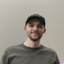

In [5]:
images[0]

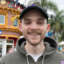

In [6]:
images[1]

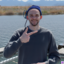

In [7]:
images[2]

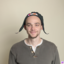

In [8]:
images[3]

In [ ]:
images = pipe("a lsn person oil painting", num_images_per_prompt=4).images

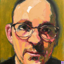

In [19]:
images[0]

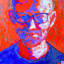

In [20]:
images[1]

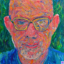

In [21]:
images[2]

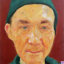

In [22]:
images[3]

In [ ]:
images = pipe("a lsn person at the beach", num_images_per_prompt=4).images

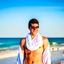

In [29]:
images[0]

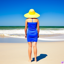

In [30]:
images[1]

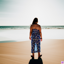

In [31]:
images[2]

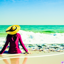

In [32]:
images[3]

In [ ]:
images = pipe("a lsn person beach", num_images_per_prompt=4).images

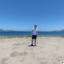

In [39]:
images[0]

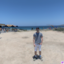

In [40]:
images[1]

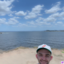

In [41]:
images[2]

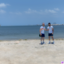

In [42]:
images[3]

In [48]:
images = pipe("lsn person on a boat", num_images_per_prompt=4).images

  0%|          | 0/100 [00:00<?, ?it/s]

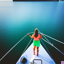

In [49]:
images[0]

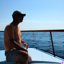

In [50]:
images[1]

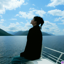

In [51]:
images[2]

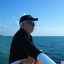

In [52]:
images[3]